#### The objective of this assignment is to implement PCA on a given dataset and analyse the results.

In [9]:
import pandas as pd

# Load the Wine dataset
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]

wine_df = pd.read_csv("wine.data", header=None, names=column_names)

In [10]:
X = wine_df.drop("Class", axis=1)  # Features
y = wine_df["Class"]  # Target variable


In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components you want to retain
pca = PCA(n_components=None)  # You can specify the number of components here

# Fit PCA to the scaled data
pca.fit(X_scaled)

# Transform the data to the principal components
X_pca = pca.transform(X_scaled)


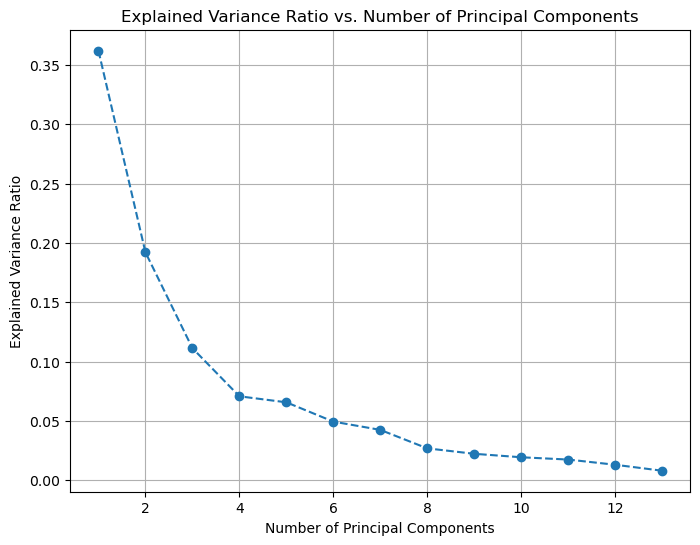

In [13]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio vs. Number of Principal Components")
plt.grid()
plt.show()


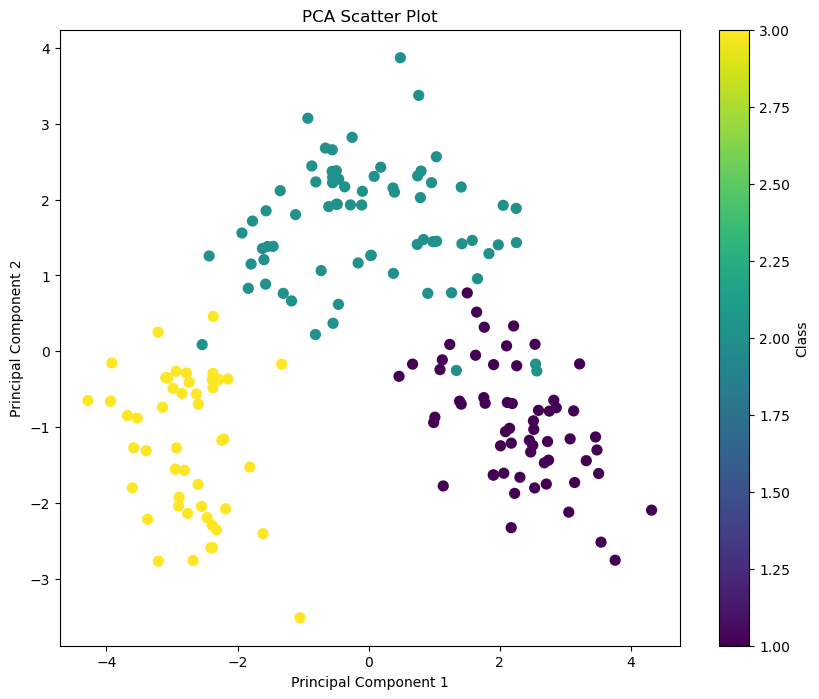

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot")
plt.colorbar(label="Class")
plt.show()


In [15]:
from sklearn.cluster import KMeans

num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_pca)

# Add cluster labels to the DataFrame
wine_df["Cluster"] = kmeans.labels_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_pca)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

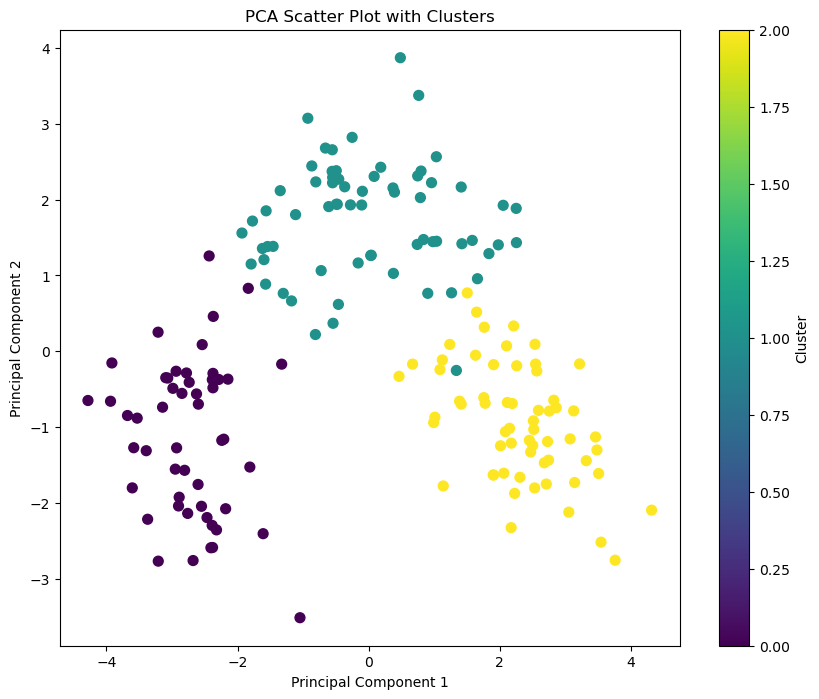

In [17]:
# Add cluster labels to the original DataFrame
wine_df['Cluster'] = kmeans.labels_

# Visualize PCA results
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot with Clusters')
plt.colorbar(label='Cluster')
plt.show()